### Multiple Linear Regression Model using Gradient Descent (w/o numpy and pandas)

In [372]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [373]:
# Using dataset from sklearn

boston = datasets.load_boston()

In [374]:
# Loading dataset

df = pd.DataFrame(data = boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [375]:
# Renaming columns

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [376]:
# Adding our target variable

df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Model Building

In [377]:
# Defining our dependent and independent variables

X = df.drop('Price', axis=1)   # independent variables / features
y = df['Price']                # dependent variable / label

In [378]:
# Train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [379]:
# Scaling data

X_train_scaled = ((X_train - X_train.mean()))/X_train.std()

In [380]:
X_array = X_train_scaled.values

x_list = X_array.tolist()

y_array = np.array(y_train).flatten()

In [381]:
def get_transpose(x):
    result = [[0 for column in range(len(x))] for row in range(len(x[0]))]
    for i in range(len(x)):
        for j in range(len(x[0])):
            result[j][i] = x[i][j]
    return result

In [382]:
# Defining a function for numpy dot product

def get_dot_prod(mat1, mat2):
    res = []
    for i in range(len(mat1)):
        row = []
        for j in range(len(mat2[0])):
            val = 0
            for k in range(len(mat2)):
                val += mat1[i][k] * mat2[k][j]
            row.append(val)
        res.append(row)
    return res

In [383]:
def grad_descent_fun(X, y, alpha, epoch):
    
    for row in range(len(X)):
        X[row].insert(0,1)
        
    n = len(X[0])
    
    theta = []
    for i in range(n):
        theta.append(1)
        
    theta_t = get_transpose([theta])
    h = get_dot_prod(X, theta_t)
    
    #Gradient descent
    
    cost=np.ones(epoch)
    for i in range(0, epoch): 
        a_div_x = alpha/len(X)
    
        error = []
        for k in range(len(h)):
            error.append(h[k] - y[k])   
        sum_error = sum(error)

        theta[0] = theta[0] - (a_div_x)*sum_error
        #print(theta[0])
        
        X_t = get_transpose(X)
        #print("XXXXXXX")
        #print(X)
        #print('____________')
        #print(X_t)
        #error_X = get_dot_prod(X_t, error)
        #print(error_X)
        #sum_error_X = sum(map(sum, error_X))   
        #print(sum_error_X)
        
        for j in range (1, len(theta)):
            #X_t = get_transpose(X)
            error_X = get_dot_prod([X_t[j]], error)
            sum_error_X = sum(map(sum, error_X))   
            theta[j] = theta[j] - (a_div_x)*sum_error_X
        print(theta[j])
        h = get_dot_prod(X, theta_t)
        m = len(X[0])
        
        error_sq = []
        for p in range(len(error)):
            error_sq.append(error[p]**2)
        #print(error_sq)
            
        cost[i] = 1/(2*m)*sum(error_sq)
    return(cost, theta)
            

In [384]:
cost, theta = grad_descent_fun(x_list, y_array, 0.01, 500)
print(theta)

0.9058012471093055
0.8116024942186111
0.7174037413279166
0.6232049884372222
0.5290062355465277
0.43480748265583324
0.3406087297651388
0.2464099768744443
0.1522112239837498
0.05801247109305532
-0.036186281797639164
-0.13038503468833365
-0.22458378757902814
-0.31878254046972265
-0.4129812933604171
-0.5071800462511116
-0.601378799141806
-0.6955775520325005
-0.789776304923195
-0.8839750578138894
-0.9781738107045839
-1.0723725635952783
-1.1665713164859728
-1.2607700693766672
-1.3549688222673617
-1.4491675751580562
-1.5433663280487506
-1.637565080939445
-1.7317638338301395
-1.825962586720834
-1.9201613396115285
-2.014360092502223
-2.108558845392918
-2.2027575982836125
-2.296956351174307
-2.391155104065002
-2.4853538569556965
-2.5795526098463912
-2.673751362737086
-2.7679501156277806
-2.8621488685184753
-2.95634762140917
-3.0505463742998646
-3.1447451271905593
-3.238943880081254
-3.3331426329719487
-3.4273413858626434
-3.521540138753338
-3.6157388916440327
-3.7099376445347274
-3.8041363974254

-41.67203505948487
-41.76623381237557
-41.860432565266265
-41.95463131815696
-42.04883007104766
-42.14302882393836
-42.237227576829056
-42.331426329719754
-42.42562508261045
-42.51982383550115
-42.61402258839185
-42.708221341282545
-42.80242009417324
-42.89661884706394
-42.99081759995464
-43.08501635284534
-43.179215105736034
-43.27341385862673
-43.36761261151743
-43.46181136440813
-43.556010117298825
-43.65020887018952
-43.74440762308022
-43.83860637597092
-43.93280512886162
-44.027003881752314
-44.12120263464301
-44.21540138753371
-44.30960014042441
-44.403798893315106
-44.4979976462058
-44.5921963990965
-44.6863951519872
-44.7805939048779
-44.874792657768594
-44.96899141065929
-45.06319016354999
-45.15738891644069
-45.251587669331386
-45.34578642222208
-45.43998517511278
-45.53418392800348
-45.62838268089418
-45.722581433784875
-45.81678018667557
-45.91097893956627
-46.00517769245697
-46.099376445347666
[array([109.72740113]), -31.343083685633577, 24.828690936691064, -37.91103965184

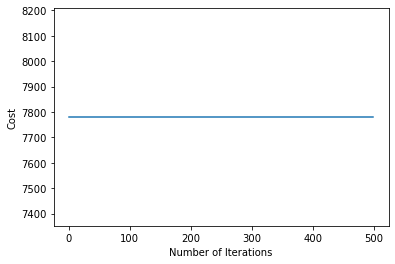

In [371]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()